# TP K-Means

## Imports

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn import neighbors, datasets
import pandas as pd
from sklearn.cluster import KMeans
import sklearn.metrics as metrics

## Load iris dataset
Load the iris dataset samples, but don't use the labels (do as if this dataset was not labeled).
Only use the following features:
* Petal width
* Sepal length
* Petal length

In [3]:
iris = datasets.load_iris()
X_all = iris.data
y = iris.target

SEPAL_LENGTH = 0
PETAL_LENGTH = 2
PETAL_WIDTH = 3
X = X_all[:, [SEPAL_LENGTH, PETAL_WIDTH, PETAL_LENGTH]]

## Plot clustering on 3 dimensions

In [4]:
def plot_3d(X, y):
    fig = plt.figure()
    ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=48, azim=134)

    plt.cla()

    ax.scatter(X[:, 2], X[:, 0], X[:, 1], c=y.astype(np.float))

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')

## Find the best number of centroids
Use the "Elbow" method to find the best number of centroids

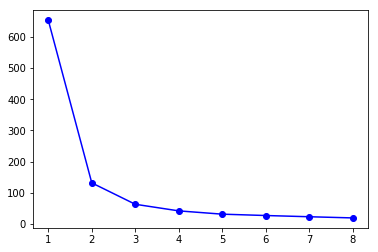

In [5]:
ks = range(1, 9)
inertias = []

for n_cluster in ks:
    kmeans = KMeans(n_clusters=n_cluster).fit(X)
    inertias.append(kmeans.inertia_)

fig = plt.figure()
plt.plot(ks, inertias, '-bo')

## Q6: Based on the "Elbow" method, what is the optimal number of centroids? How did you determine it?

La valeur la plus appropriée pour k serait dans notre cas 3 car, comme vu au cours, le SSE (inertia) doit être fortement réduit.

## Correct number of centroids
Configure the estimator with the correct number of centroids

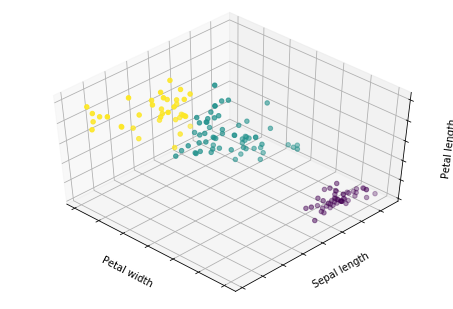

In [6]:
k = 3
kmeans = KMeans(n_clusters=k).fit(X)
y_pred = kmeans.predict(X)
plot_3d(X, y_pred)

## Bad initialization
Configure the estimator with the correct number of centroids, but with a bad initialization configuration. Try to reduce the amount of times (default is 10) that the algorithm will be run with different centroid seeds.

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1,
    n_clusters=3, n_init=1, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)


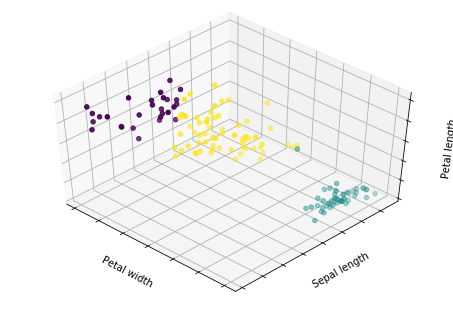

In [7]:
k = 3
kmeans = KMeans(n_clusters=k, n_init=1, max_iter=1).fit(X)
print(kmeans)
y_pred = kmeans.predict(X)
plot_3d(X, y_pred)

## Q7: What incidence has a bad initialization?

En changeant le n_init, on modifie le nombre de fois que l'algorithme est lancé alors que max_iter modifie le nombre d'itérations par algorithme.

## Wrong number of centroids
Configure the estimator with the wrong number of centroids (too much for instance)

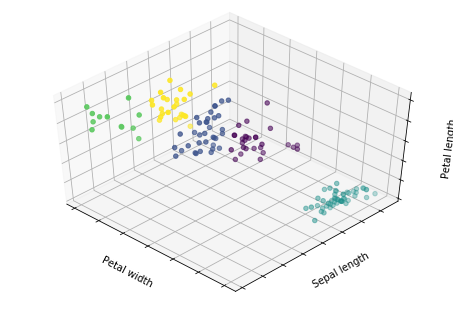

In [8]:
k = 5
kmeans = KMeans(n_clusters=k).fit(X)
y_pred = kmeans.predict(X)
plot_3d(X, y_pred)

## Q7: What incidence has a wrong number of centroids?

Comme il n'y a que trois classes, certaines classes sont divisées en plusieurs parties. Bien que les clusters soient correctement divisés, ceux-ci sont très proches les uns des autres et la colorisation perd de sa sémantique.

# Optional: Color quantization

Load an image and show it

In [ ]:
# TODO

Transform the image to a 2D numpy array

In [ ]:
# TODO

Fitting model on a small sub-sample of the data

In [ ]:
# TODO

Get labels (color indices) for all points

In [ ]:
# TODO

Plot the resulting image after color quantization

In [10]:
def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0

    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]] / 255.
            label_idx += 1
            
    return image

In [ ]:
# TODO